In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  

In [27]:
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'email': ['laura@example.com', 'craig@example.com', 'mary@example.com', 'jamie@example.com', 'john@example.com', 'susan@example.com', 'mark@example.com', 'emily@example.com', 'michael@example.com'],
    'Identifier': [2070, 4081, 9346, 5079, 1234, 5678, 9012, 3456, 7890],
    'First name': ['Laura', 'Craig', 'Mary', 'Jamie', 'John', 'Susan', 'Mark', 'Emily', 'Michael'],
    'pred': [0, 1, 0, 1, 0, 1, 0, 0, 1]
}

df = pd.DataFrame(data)
df

,ID,email,Identifier,First name,pred
0,1,laura@example.com,2070,Laura,0
1,2,craig@example.com,4081,Craig,1
2,3,mary@example.com,9346,Mary,0
3,4,jamie@example.com,5079,Jamie,1
4,5,john@example.com,1234,John,0
5,6,susan@example.com,5678,Susan,1
6,7,mark@example.com,9012,Mark,0
7,8,emily@example.com,3456,Emily,0
8,9,michael@example.com,7890,Michael,1


In [28]:
# Probabilidades incondicionais
Probabilidade_ter_esqz_com_pred = 0.25  # Probabilidade de ter esquizofrenia com predisposição
Probabilidade_global = 1/100  # Probabilidade de ter esquizofrenia globalmente
Probabilidade_teste_positivo = 0.9  # Probabilidade de teste positivo dado que tem esquizofrenia
Probabilidade_teste_negativo = 0.1  # Probabilidade de teste positivo dado que não tem esquizofrenia

#B
Probabilidade_B = (Probabilidade_ter_esqz_com_pred * Probabilidade_teste_positivo) + ((1 - Probabilidade_ter_esqz_com_pred) * Probabilidade_teste_negativo)

# Calcular a probabilidade condicional P(M|T) usando a fórmula de Bayes
Probabilidade_com_pred = (Probabilidade_teste_positivo * Probabilidade_ter_esqz_com_pred) / Probabilidade_B
# Imprimir o resultado
print("A probabilidade de ter esquizofrenia com predisposição dado um teste positivo é:", Probabilidade_com_pred)

A probabilidade de ter esquizofrenia com predisposição dado um teste positivo é: 0.7499999999999999


In [29]:
# Probabilidades incondicionais
Probabilidade_ter_esqz_com_pred = 0.25  # Probabilidade de ter esquizofrenia com predisposição
Probabilidade_global = 1/100  # Probabilidade de ter esquizofrenia
Probabilidade_teste_positivo = 0.9  # Probabilidade de teste positivo dado que tem esquizofrenia
Probabilidade_teste_negativo = 0.1  # Probabilidade de teste positivo dado que não tem esquizofrenia


Probabilidade_B = (Probabilidade_global * Probabilidade_teste_positivo) + ((1 - Probabilidade_global) * Probabilidade_teste_negativo)

# Calcular a probabilidade condicional P(M|T) usando a fórmula de Bayes
Pobabilidade_sem_pred = (Probabilidade_teste_positivo * Probabilidade_global) / Probabilidade_B
# Imprimir o resultado
print("A probabilidade de ter esquizofrenia sem predisposição dado um teste positivo é:", Pobabilidade_sem_pred)

A probabilidade de ter esquizofrenia sem predisposição dado um teste positivo é: 0.08333333333333333


In [30]:

df

,ID,email,Identifier,First name,pred
0,1,laura@example.com,2070,Laura,0
1,2,craig@example.com,4081,Craig,1
2,3,mary@example.com,9346,Mary,0
3,4,jamie@example.com,5079,Jamie,1
4,5,john@example.com,1234,John,0
5,6,susan@example.com,5678,Susan,1
6,7,mark@example.com,9012,Mark,0
7,8,emily@example.com,3456,Emily,0
8,9,michael@example.com,7890,Michael,1


In [34]:
df['P(M|T)'] = (Probabilidade_teste_positivo * Probabilidade_global) / ((Probabilidade_global * Probabilidade_teste_positivo) + ((1 - Probabilidade_global) * Probabilidade_teste_negativo))
df['P(E|M|T)'] = (Probabilidade_teste_positivo * Probabilidade_ter_esqz_com_pred) / ((Probabilidade_ter_esqz_com_pred * Probabilidade_teste_positivo) + ((1 - Probabilidade_ter_esqz_com_pred) * Probabilidade_teste_negativo))

df.sample(5)


,ID,email,Identifier,First name,pred,P(),P(E|M|T),Probabilidade,P(M|T)
7,8,emily@example.com,3456,Emily,0,0.083333,0.75,0.083333,0.083333
8,9,michael@example.com,7890,Michael,1,0.083333,0.75,0.750000,0.083333
3,4,jamie@example.com,5079,Jamie,1,0.083333,0.75,0.750000,0.083333
1,2,craig@example.com,4081,Craig,1,0.083333,0.75,0.750000,0.083333
6,7,mark@example.com,9012,Mark,0,0.083333,0.75,0.083333,0.083333


In [32]:


df['Probabilidade'] = df['pred'].apply(lambda x: Pobabilidade_sem_pred if x==0 else Probabilidade_com_pred)  

df

,ID,email,Identifier,First name,pred,P(),P(E|M|T),Probabilidade
0,1,laura@example.com,2070,Laura,0,0.083333,0.75,0.083333
1,2,craig@example.com,4081,Craig,1,0.083333,0.75,0.750000
2,3,mary@example.com,9346,Mary,0,0.083333,0.75,0.083333
3,4,jamie@example.com,5079,Jamie,1,0.083333,0.75,0.750000
4,5,john@example.com,1234,John,0,0.083333,0.75,0.083333
5,6,susan@example.com,5678,Susan,1,0.083333,0.75,0.750000
6,7,mark@example.com,9012,Mark,0,0.083333,0.75,0.083333
7,8,emily@example.com,3456,Emily,0,0.083333,0.75,0.083333
8,9,michael@example.com,7890,Michael,1,0.083333,0.75,0.750000


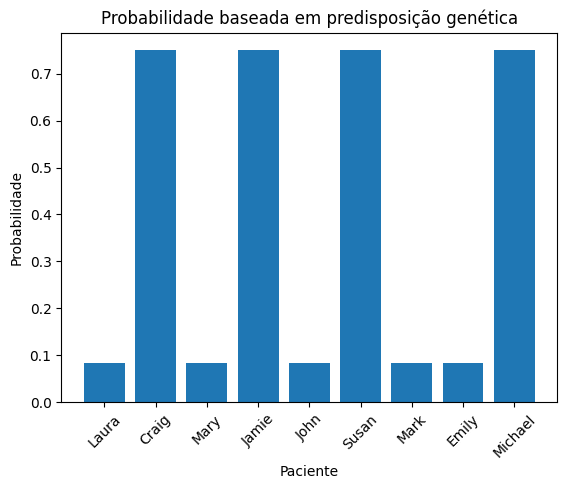

In [33]:
plt.bar(df.index, df['Probabilidade'])

plt.xlabel('Paciente')
plt.ylabel('Probabilidade')

plt.title('Probabilidade baseada em predisposição genética')

plt.xticks(df.index, df['First name'], rotation=45)

plt.show()